In [1]:
# library and modul imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Erste 5 Zeilen der Daten (Features):
   SquareFootage  Bedrooms  DistanceToPark
0           1360         5        1.040848
1           1794         3        1.509102
2           1630         1        4.915909
3           1595         2        1.930388
4           2138         3        3.940240

Erste 5 Zeilen der Zielvariable (Hauspreis in Tausend USD):
0    761.0
1    949.0
2    730.0
3    796.0
4    894.0
dtype: float64

Größe des Trainings-Sets: 8000 Beobachtungen
Größe des Test-Sets: 2000 Beobachtungen

Erste 5 skalierten Trainings-Features:
   SquareFootage  Bedrooms  DistanceToPark
0       0.554420 -0.711155        1.677238
1       1.058688  1.404590        1.456754
2       1.225840 -1.416403       -0.451450
3      -0.390906  1.404590        1.614045
4       1.023571 -1.416403        1.522325

--- Modell-Ergebnisse nach dem Training ---
Intercept (Achsenabschnitt c): 846.24
Koeffizienten (Gewichte):
SquareFootage     214.39
Bedrooms           71.68
DistanceToPark    -13.28
dtype:

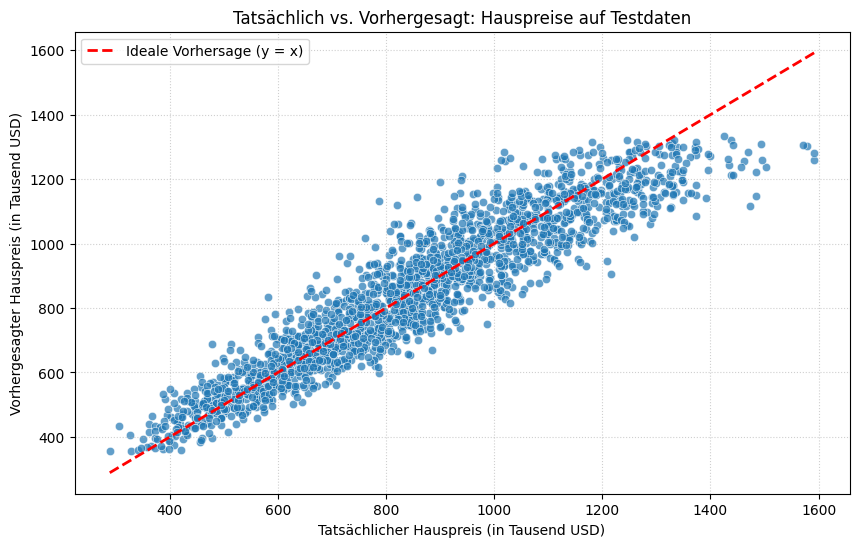

In [2]:
# 1. Simulieren der Daten (In einem echten Projekt würden Sie hier pd.read_csv('...') verwenden)
np.random.seed(42)
data_size = 10000
X = pd.DataFrame({
    'SquareFootage': np.random.randint(500, 3000, data_size),
    'Bedrooms': np.random.randint(1, 6, data_size),
    'DistanceToPark': np.random.uniform(0.1, 5.0, data_size)
})

# Die Hauspreise (Target) werden als eine lineare Kombination der Features plus Rauschen simuliert
# (Angenommen in Tausend USD)
y = (X['SquareFootage'] * 0.3 + X['Bedrooms'] * 50 + X['DistanceToPark'] * -10 + 200) * (1 + np.random.normal(0, 0.1, data_size))
y = y.round(0)

print("Erste 5 Zeilen der Daten (Features):")
print(X.head())
print("\nErste 5 Zeilen der Zielvariable (Hauspreis in Tausend USD):")
print(y.head())


# Aufteilung in Trainings- und Testdaten (80% Training, 20% Test)
# random_state sorgt für reproduzierbare Ergebnisse
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nGröße des Trainings-Sets: {X_train.shape[0]} Beobachtungen")
print(f"Größe des Test-Sets: {X_test.shape[0]} Beobachtungen")


# Initialisieren des Scalers
scaler = StandardScaler()

# 1. FIT & TRANSFORM des Trainings-Sets: Der Scaler lernt Mittelwert und Standardabweichung
X_train_scaled = scaler.fit_transform(X_train)

# 2. Nur TRANSFORM des Test-Sets: Anwendung der im Training gelernten Skalierung
X_test_scaled = scaler.transform(X_test)

# Wir wandeln die skalierten NumPy-Arrays zurück in DataFrames für eine bessere Übersicht
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nErste 5 skalierten Trainings-Features:")
print(X_train_scaled.head())


# Initialisieren des Modells
linear_model = LinearRegression()

# Fitten/Trainieren des Modells (NUR auf den Trainingsdaten!)
linear_model.fit(X_train_scaled, y_train)

print("\n--- Modell-Ergebnisse nach dem Training ---")
print(f"Intercept (Achsenabschnitt c): {linear_model.intercept_:.2f}")

# Anzeigen der gelernten Koeffizienten (Gewichte w)
coefficients = pd.Series(linear_model.coef_, index=X_train_scaled.columns)
print("Koeffizienten (Gewichte):")
print(coefficients.round(2))


# Vorhersagen auf dem Test-Set
y_pred = linear_model.predict(X_test_scaled)

# 1. R²-Score (Bestimmtheitsmaß): Wie gut erklärt das Modell die Varianz? (Maximal 1.0)
r2 = r2_score(y_test, y_pred)

# 2. Mean Squared Error (MSE): Durchschnittliche quadratische Abweichung der Vorhersagen
mse = mean_squared_error(y_test, y_pred)

# 3. Root Mean Squared Error (RMSE): Besser interpretierbar als MSE, da in der Einheit des Target
rmse = np.sqrt(mse)

print("\n--- Modellgüte auf dem UNGESEHENEN TEST-SET ---")
print(f"R²-Score (Bestimmtheitsmaß): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Tausend USD")


# --- VORBEREITUNG DER DATEN (Wiederverwendung und Setup aus der ersten Lösung) ---
# Hinweis: Wir gehen davon aus, dass y_test und y_pred aus dem vorherigen Schritt
# (Bewertung auf dem Test-Set) noch im Speicher vorhanden sind.

# Annahme: y_test und y_pred sind NumPy-Arrays oder Pandas Series/DataFrames.
# Für eine saubere Darstellung erstellen wir einen DataFrame:
results_df = pd.DataFrame({
    'Actual Price': y_test,  # Die tatsächlichen Werte
    'Predicted Price': y_pred # Die vorhergesagten Werte
})
# -----------------------------------------------------------------------------

plt.figure(figsize=(10, 6))

# Erstellen des Scatter-Plots
sns.scatterplot(
    x='Actual Price',
    y='Predicted Price',
    data=results_df,
    alpha=0.7 # Transparenz, falls viele Punkte übereinander liegen
)

# Zeichnen der idealen 45-Grad-Linie (Perfekte Vorhersage)
# np.linspace erzeugt gleichmäßig verteilte Punkte zwischen Minimum und Maximum
min_val = results_df.min().min()
max_val = results_df.max().max()
plt.plot(
    [min_val, max_val], # X-Koordinaten
    [min_val, max_val], # Y-Koordinaten
    color='red',
    linestyle='--',
    linewidth=2,
    label='Ideale Vorhersage (y = x)'
)

plt.title('Tatsächlich vs. Vorhergesagt: Hauspreise auf Testdaten')
plt.xlabel('Tatsächlicher Hauspreis (in Tausend USD)')
plt.ylabel('Vorhergesagter Hauspreis (in Tausend USD)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()